# Facebook Message Analyzer

<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
</ul>

In [145]:
import os
import json
import numpy as np
import pylab as pl
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 10
MESSAGE_BOUND = 3000

In [150]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/facebook-data-json/messages/inbox/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [151]:
chats = os.listdir(CURRENT_DIRECTORY + "/facebook-data-json/messages/inbox/")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0

In [152]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 349 chats...
derekalexandcharles_e52wo2pkyq
bendreier_da5xwmtsnw
jamiechen_ayom3jqhww
lillyavril_gb1r2otocw
lovelockdown_8-0cs6qoka
samanthafountain_xfaomxgt-g
noviourmother_cNky39AVVQ
morganfisher_2quz97acsw
ashleywong_i2hetjnnyq
facebookuser_yf9-zu3l-g
katiegao_w-f-lg4dda
JessicaRyanWinnieand17others_HgbtNQE87A
alexanderchen_m1ooh7bixq
majakozerski_8c0_bjb0ig
aanneshasatpati_r-0md5ygea
abhishekmalani_ory4jtm9kg
kendallwitaszek_x5c96ed0ba
ZihanXiong_WHBP5bExRA
ziyichen_gjnlkg1gfw
ryankalosandken_55gvx7k4ya
samanthatham_7pgfzigaow
DaranandTJ_VVWB7pftow
alexiswoodrick_z-qxzfbskw
winnieandjoy_j_7rsx83ew
zeelpatel_kvb00rcb5a
noahepstein_lut-pmgzlq
ericanewmancorre_jtwbfajt1g
shiviaggarwal_ckasmlukxa
juheegoyal_f7m3b_bc4w
MelissaTiffBobbyand4others_K4OFkUdReQ
austinshin_imcppmhv-a
YouTubegang_1VloLwlhIw
kaimcnamee_uaej-nqfgw
FROSHREP_HGLfjn9m-w
AbeAlyssaandCalla_8ioAZGg5Wg
alecsanderlestrud_uit9-ssnlg
KenEvelynSamanthaand24others_D8jg8UYGeA
dennislin_rsqotswlzq
josephfarina_jjv33

oliviasahaneogi_vvwebccf7q
elainiagupta_cu9k9lkhzg
calebjonathankianandkai_jsy9nop4yw
lynneashuck_me21wchtrq
Finished processing chats...


In [153]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 2044 messages - WinnieLu_H-JlTSVgAw
1 - 1925 messages - FROSHREP_HGLfjn9m-w
2 - 1911 messages - Harvard2022ChineseFoodInterestChat_n75GYLMLRA
3 - 1775 messages - CindyGao_fqZN8k8_JA
4 - 1638 messages - yucun_poD4Ggl8Bw
5 - 1480 messages - CallaBai_0saSnqDekw
6 - 1478 messages - JoyWang__bW-jJILcg
7 - 1330 messages - DaranZhao_kPA81Z61dw
8 - 1070 messages - hpair22_h7kaVHAnTA
9 - 854 messages - CSAFroshVPs_qs145dgenw
10 - 735 messages - YouTubegang_1VloLwlhIw
11 - 729 messages - CharlesHua_LFYlX7pEKA
12 - 669 messages - EuropePostConf_FOMPYIewMA
13 - 618 messages - KristyZeng_voQQZRghkA
14 - 525 messages - ZihanXiong_WHBP5bExRA
15 - 509 messages - ddaeng_94t5GZnzKg
16 - 469 messages - 130XBFam_8Rmvb9Wn4A
17 - 467 messages - AmyWang_WGvCOROGpA
18 - 462 messages - KarenChen_sh_WRECgBg
19 - 432 messages - RoseHong_YlfQGNFTug
20 - 396 messages - MatthewHo_gPvdgzHbGw
21 - 367 messages - JordanLee_Kp6oAd7Bhg
22 - 354 messages - petercshim_zkcqgn4y7w
23 - 324 messages - estherlee_rifjbwgim

In [154]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)

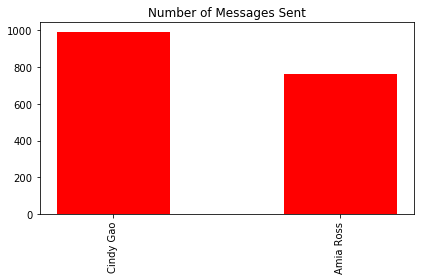

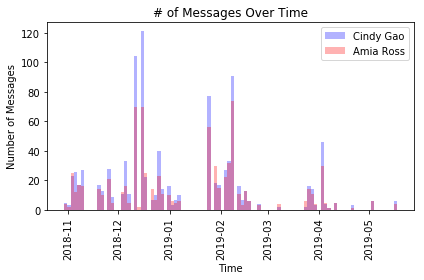

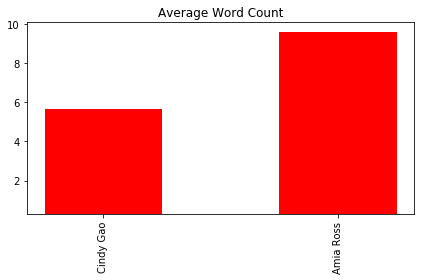

In [155]:
plot(3)

In [162]:
# Find how active I am in all of my chats (i.e., how many messages I send compare to total messages sent per chat)
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}

    for message in messages:
        try:
            name = message["sender_name"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1
            
    str_chat = str(chat)
    index_underscore = str_chat.index("_")
    readable_name = str_chat[0:index_underscore]
    
    try:
        my_name = "Amia Ross"
        my_messages = number_messages[my_name]
    
        activity_ratio = float(my_messages) / float(len(messages))
        activity_percentage = round(activity_ratio * 100)
        print(readable_name + ": " + my_name + " is " + str(activity_percentage) + "% active")
    except KeyError:
        print(readable_name + ": " + my_name + " is 0% active")

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

WinnieLu: Amia Ross is 44% active
FROSHREP: Amia Ross is 31% active
Harvard2022ChineseFoodInterestChat: Amia Ross is 0% active
CindyGao: Amia Ross is 43% active
yucun: Amia Ross is 33% active
CallaBai: Amia Ross is 54% active
JoyWang: Amia Ross is 47% active
DaranZhao: Amia Ross is 47% active
hpair22: Amia Ross is 23% active
CSAFroshVPs: Amia Ross is 16% active
YouTubegang: Amia Ross is 28% active
CharlesHua: Amia Ross is 47% active
EuropePostConf: Amia Ross is 25% active
KristyZeng: Amia Ross is 45% active
ZihanXiong: Amia Ross is 48% active
ddaeng: Amia Ross is 3% active
130XBFam: Amia Ross is 0% active
AmyWang: Amia Ross is 44% active
KarenChen: Amia Ross is 40% active
RoseHong: Amia Ross is 45% active
MatthewHo: Amia Ross is 42% active
JordanLee: Amia Ross is 46% active
petercshim: Amia Ross is 45% active
estherlee: Amia Ross is 36% active
NicolasXu: Amia Ross is 45% active
KathyLing: Amia Ross is 46% active
Roomies: Amia Ross is 5% active
CSAFroshReps2018: Amia Ross is 33% active


In [157]:
pac_location = CURRENT_DIRECTORY + "/facebook-data-json/likes_and_reactions/posts_and_comments.json"
pac_file = open(pac_location)
pac_data = json.load(pac_file)

In [158]:
# Analyze what types of reactions I use most frequently.
reactions = {}
reactions_timestamp = 1456272000

reactions_data = pac_data["reactions"]
for reaction_data in reactions_data:
    current_timestamp = reaction_data["timestamp"]
    if current_timestamp > reactions_timestamp:
        current_data = reaction_data["data"]
        current_reaction_data = current_data[0]
        current_reaction_actor = current_reaction_data["reaction"]
        current_reaction = current_reaction_actor["reaction"]
        reactions[current_reaction] = reactions.get(current_reaction, 0)
        reactions[current_reaction] += 1

print(str(reactions))

{'SORRY': 47, 'ANGER': 15, 'WOW': 38, 'HAHA': 48, 'LOVE': 213, 'LIKE': 1325}


In [159]:
# Normalize my reactions, because I use like way too often, and then plot the other reactions.
reactions_no_like = {}
for reaction in reactions:
    if reaction != "LIKE":
        reactions_no_like[reaction] = reactions[reaction]
        
print(str(reactions_no_like))

def plot_reactions(reactions):
    plotted_data = reactions_no_like
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Different Reactions')
    pl.tight_layout()
    pl.show()
    
def plot_2(reactions):
    plot_reactions(reactions)

{'SORRY': 47, 'ANGER': 15, 'WOW': 38, 'HAHA': 48, 'LOVE': 213}


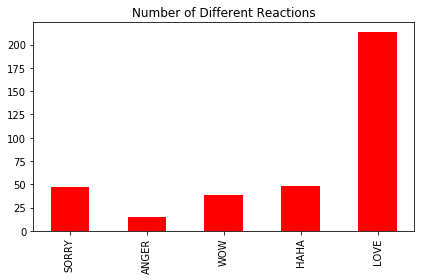

In [127]:
plot_2(reactions)